N = 1000: Estimated value of π = 3.18
N = 10000: Estimated value of π = 3.1428
N = 100000: Estimated value of π = 3.14556
N = 1000000: Estimated value of π = 3.14464


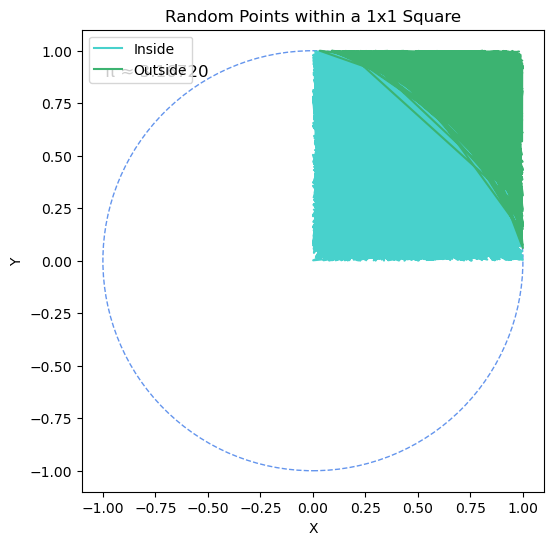

In [2]:
# Python DeCal
# HW 6: Plotting
# Question 3 - Monte Carlo π

# Did you know that we can calculate the value of π by generating random numbers? 
# We first generate a whole bunch of random points in a 1x1 square with the corner at the origin. 
# Then we see how many of the points are within a distance 1 of the origin. 
# There points all fall in a quarter of a circle centered on the origin. Then using the relation

# Nin/N ≈ Aqc/A

# we can calculate π from the ratio of the areas of a quarter circle and the square.

# Calculate the value of π using this procedure for N = 1e3, 1e4, 1e5, 1e6, and print your results. 
# Also create a plot of these points for N = 1e4. The points within the quarter circle should all be one color and
# the points outside should also be a different color. Also please make sure your plot is a square and put the
# value of pi from that run on your plot as text. 

import random
import matplotlib.pyplot as plt

def estimate_pi(N):
    points = [(random.uniform(0, 1), random.uniform(0, 1)) for _ in range(N)]
    points_inside_circle = sum(1 for x, y in points if x**2 + y**2 <= 1)
    pi_estimate = 4 * points_inside_circle / N
    return pi_estimate, points

Ns = [int(1e3), int(1e4), int(1e5), int(1e6)]

for N in Ns: 
    pi_estimate, _ = estimate_pi(N)
    print(f"N = {N}: Estimated value of π = {pi_estimate}")
    
N = int(1e4)
pi_estimate, points = estimate_pi(N)

inside_points = [(x, y) for x, y in points if x**2 + y**2 <= 1]
outside_points = [(x, y) for x, y in points if x**2 + y**2 > 1]

plt.figure(figsize=(6, 6))
plt.plot([x for x, _ in inside_points], [y for _, y in inside_points], 'mediumturquoise', label='Inside')
plt.plot([x for x, _ in outside_points], [y for _, y in outside_points], 'mediumseagreen', label='Outside')

circle = plt.Circle((0, 0), 1, color='cornflowerblue', fill=False, linestyle='--')
plt.gca().add_patch(circle)

plt.gca().set_aspect('equal', adjustable='box')

plt.text(0.05, 0.9, f'π ≈ {pi_estimate:.5f}', transform=plt.gca().transAxes, fontsize=12)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points within a 1x1 Square')

plt.legend()
plt.show()